# Grab Models from File


In [125]:
import pickle
loaded_net = pickle.load(open('neuralNetGL3'+".sav", 'rb'))
loaded_lin = pickle.load(open('linearRegGL3'+".sav", 'rb'))

# Get Data from CSV


In [126]:
import pandas as pd
import numpy as np
dataFrame = pd.read_csv("dataGL3.csv")

In [127]:
sample = dataFrame.sample(frac = .05)

In [128]:
input_layer = sample[['X','Y',"W","H"]]

In [129]:
from sklearn.neural_network import MLPRegressor
import math
##In order: LPX , RPX, LPY, LPZ
def getNeuralNet(x):
    data =  loaded_net.predict([x])[0]
    centerX = (data[0] + data[1])/2.0
    angle = 90 - np.arctan2((abs(data[3].item())),centerX)*180/3.14
    plotThing(centerX, angle, data[3].item())
    #print(angle)
    #print("Angle: ", (90-angle), " Degrees")
    

In [130]:
import matplotlib.pyplot as plt
fig = plt.figure()
#fig = plt.subplots(nrows = 1, ncols = 2)
plt.subplot(2,1,1)
plt.ylabel('X Values')
plt.xlabel('Angle in Degrees')
plt.axis("auto")

plt.subplot(2,1,2)
plt.ylabel('Z Values')
plt.xlabel('Angle in Degrees')
plt.axis("auto")


def plotThing(centerX, angle, z):
    plt.subplot(2,1,1)
    plt.plot(angle,centerX, ',')
    plt.subplot(2,1,2)
    plt.plot(angle, z, ",")

In [131]:
input_layer.apply(lambda x: getNeuralNet(x), axis =1);

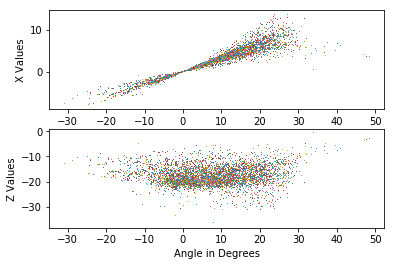

In [132]:
fig